# Прототип СГС

In [ ]:
from datetime import datetime, timedelta
import pandas as pd

from wellplan.core import TeamPool
from wellplan.services import (
    TeamManager,
    FileProductionProfile,
    LinearProductionProfile,
    NPV,
    BaseCapex,
    BaseOpex,
    ClusterRandomRiskStrategy,
    DistanceTeamMovement,
)
from wellplan.services.visualization import GraphVisualizer, GantVisualizer
from wellplan.data.file.loader import ExcelWellLoader
from wellplan.data.file.saver import ExcelPlanSaver
from wellplan.builder import PlanBuilder

## Подгрузка файлов

In [40]:
loader = ExcelWellLoader(
    file_path=r"C:\Users\desim\Downloads\Sirius_GazpromNeft-main\Sirius_GazpromNeft-main\data\Ввод ЭБ эксперимент.xlsx",
)
wells = loader.load()
# production_profile = LinearProductionProfile()
coordinates = pd.read_excel(
    r"C:\Users\desim\Downloads\Sirius_GazpromNeft-main\Sirius_GazpromNeft-main\data\База перспективного ПФ (30.01.2025).xlsm",
    header=0,
    names=["cluster", "x", "y", "z"],
)
movement = DistanceTeamMovement.from_dicts(coordinates.to_dict(orient="records"))

## Инициализация параметров

In [41]:
team_pool = TeamPool()
team_pool.add_teams(['ГС'], num_teams=1)
team_pool.add_teams(['грп'], num_teams=1)


capex = BaseCapex(
    build_cost_per_metr={
        "ГС+ГРП": 25300,
        "ННС+ГРП": 12900,
        "МЗС": 27300,
        "МЗС+ГРП": 28300,
        "ГС": 23300,
    },
    equipment_cost=2500000,
)

opex = BaseOpex(
    oil_cost_per_tone=109.9,
    water_cost_per_tone=48.6,
    repair_per_year=3093900,
    maintain_per_year=2336200,
)


npv = NPV(
    oil_price_per_tone=13896,
    project_start_date=datetime.now(),
    capex_cost=capex,
    opex_cost=opex,
    discount_rate=0.15,
)

builder = PlanBuilder(
    start=datetime.now(),
    end=datetime.now() + timedelta(days=365 * 25),
    cost_function=npv,
    
)

builder_default = PlanBuilder(
    start=datetime.now(),
    end=datetime.now() + timedelta(days=365 * 25),
    cost_function=npv,

)


builder_test = PlanBuilder(
    start=datetime.now(),
    end=datetime.now() + timedelta(days=365 * 25),
    cost_function=npv,

)



## Запуск расчета

In [42]:
plan = builder.compile(
        wells,
        manager=TeamManager(
            team_pool=team_pool,
            movement=movement,
        ),
        risk_strategy=ClusterRandomRiskStrategy(trigger_chance=0.0),
    )
print(plan)
plan.total_profit()

2025-07-15 12:14:48.761 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 6743, cost: 1117602392.4815547
2025-07-15 12:14:48.770 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 6465, cost: 938713020.992979
2025-07-15 12:14:48.777 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 658, cost: 858633162.7040551
2025-07-15 12:14:48.784 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 6912, cost: 812104119.6640875
2025-07-15 12:14:48.790 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 2008, cost: 756976134.2516422
2025-07-15 12:14:48.794 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 1705, cost: 710297795.7311075
2025-07-15 12:14:48.798 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 5611, cost: 669411125.715339
2025-07-15 12:14:48.801 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 4528, cost: 540758072.8725812


Well: 6743
Cluster: 215
Purpose: Добывающая
Well type: ГС+ГРП
Start: 2025-07-15 12:14
End: 2050-07-09 12:14
Metadata: {'team_count_drilling': 0, 'team_count_gtm': 0, 'travel_cost': 135000000, 'cash_flow': 1327281844.5470827, 'capex': 74679452.06552793, 'drill_team_penalty': 0}
Entries:
  Task: DRILLING
  Team: 43948eb1-84c1-4705-81ab-d4a70e171e93
  Timeframe: 2025-07-15 12:14 - 2025-08-14 12:14
  Duration: 30 days
  Travel time: 90 days, 0:00:00 days
  Task: GTM
  Team: 7fb638b9-7b78-4f8f-8ffb-b02ffedc1cd3
  Timeframe: 2025-08-14 12:14 - 2025-09-03 12:14
  Duration: 20 days
  Travel time: 90 days, 0:00:00 days
Cost: 1117602392.4815547
Well: 6465
Cluster: 521
Purpose: Добывающая
Well type: ГС+ГРП
Start: 2025-07-15 12:14
End: 2050-07-09 12:14
Metadata: {'team_count_drilling': 0, 'team_count_gtm': 0, 'travel_cost': 135000000, 'cash_flow': 1137689934.6790576, 'capex': 63976913.68607852, 'drill_team_penalty': 0}
Entries:
  Task: DRILLING
  Team: 43948eb1-84c1-4705-81ab-d4a70e171e93
  Timefr

6404495824.413346

### "Базовый" сценарий

In [43]:
plan

Plan(id=UUID('f99f3b7f-0779-46e5-821f-0350585fd888'), well_plans=[WellPlanContext(well=Well(name='6743', cluster='215', field='Нижне-Лисовое', layer='ЮВ2', purpose='Добывающая', well_type='ГС+ГРП', oil_rate=40.0, liq_rate=140.0, length=2910.0, init_entry_date=Timestamp('2025-02-15 00:00:00'), readiness_date=None, depend_from_cluster=None), start=datetime.datetime(2025, 7, 15, 12, 14, 48, 739645), end=datetime.datetime(2050, 7, 9, 12, 14, 48, 739645), entries=[ScheduleEntry(task=Task(duration=datetime.timedelta(days=30), description='DRILLING', aliases=('ГС', 'ННС', 'МЗС')), team=Team(id=UUID('43948eb1-84c1-4705-81ab-d4a70e171e93'), supported_tasks=frozenset({Task(duration=datetime.timedelta(days=30), description='DRILLING', aliases=('ГС', 'ННС', 'МЗС'))})), start=datetime.datetime(2025, 7, 15, 12, 14, 48, 739645), end=datetime.datetime(2025, 8, 14, 12, 14, 48, 739645), travel_time=datetime.timedelta(days=90)), ScheduleEntry(task=Task(duration=datetime.timedelta(days=20), description='G

In [44]:
plan_default = builder.compile(
        wells,
        manager=TeamManager(
            team_pool=team_pool,
            movement=movement,
        ),
        risk_strategy=ClusterRandomRiskStrategy(trigger_chance=0.0),
    )
# # print(plan_default)
# print(f"NPV сценария: {round(plan.total_profit() / 1e6, 3)} млн рублей")
# print(f"CAPEX сценария: {round(plan.total_capex() / 1e6, 3)} млн рублей")

2025-07-15 12:14:48.870 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 6743, cost: 1117602392.4815547
2025-07-15 12:14:48.878 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 6465, cost: 938713020.992979
2025-07-15 12:14:48.884 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 658, cost: 858633162.7040551
2025-07-15 12:14:48.890 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 6912, cost: 812104119.6640875
2025-07-15 12:14:48.894 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 2008, cost: 756976134.2516422
2025-07-15 12:14:48.899 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 1705, cost: 710297795.7311075
2025-07-15 12:14:48.902 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 5611, cost: 669411125.715339
2025-07-15 12:14:48.903 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 4528, cost: 540758072.8725812


### Оптимизированный сценарий

In [45]:
plan = builder.compile(
        wells,
        manager=TeamManager(
            team_pool=team_pool,
            movement=movement,
        ),
        risk_strategy=ClusterRandomRiskStrategy(trigger_chance=0.0),
    )
# print(plan_test)
# print(f"NPV сценария: {round(plan_test.total_profit() / 1e6, 3)} млн рублей")
# print(f"CAPEX сценария: {round(plan_test.total_capex() / 1e6, 3)} млн рублей")

2025-07-15 12:14:48.934 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 6743, cost: 1117602392.4815547
2025-07-15 12:14:48.942 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 6465, cost: 938713020.992979
2025-07-15 12:14:48.949 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 658, cost: 858633162.7040551
2025-07-15 12:14:48.955 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 6912, cost: 812104119.6640875
2025-07-15 12:14:48.959 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 2008, cost: 756976134.2516422
2025-07-15 12:14:48.964 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 1705, cost: 710297795.7311075
2025-07-15 12:14:48.967 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 5611, cost: 669411125.715339
2025-07-15 12:14:48.970 | DEBUG    | wellplan.builder:compile:64 - Best candidate: 4528, cost: 540758072.8725812


## Выгрузка в виде "Ввод ЭБ"

In [46]:
saver = ExcelPlanSaver('plan.xlsx')
saver.save(plan_test)

C:\Users\desim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


ValueError: Sheet 'f0cd1022-43cf-4c34-a82d-5e084e5bb201' already exists and if_sheet_exists is set to 'error'.

## Визуализация расчетов

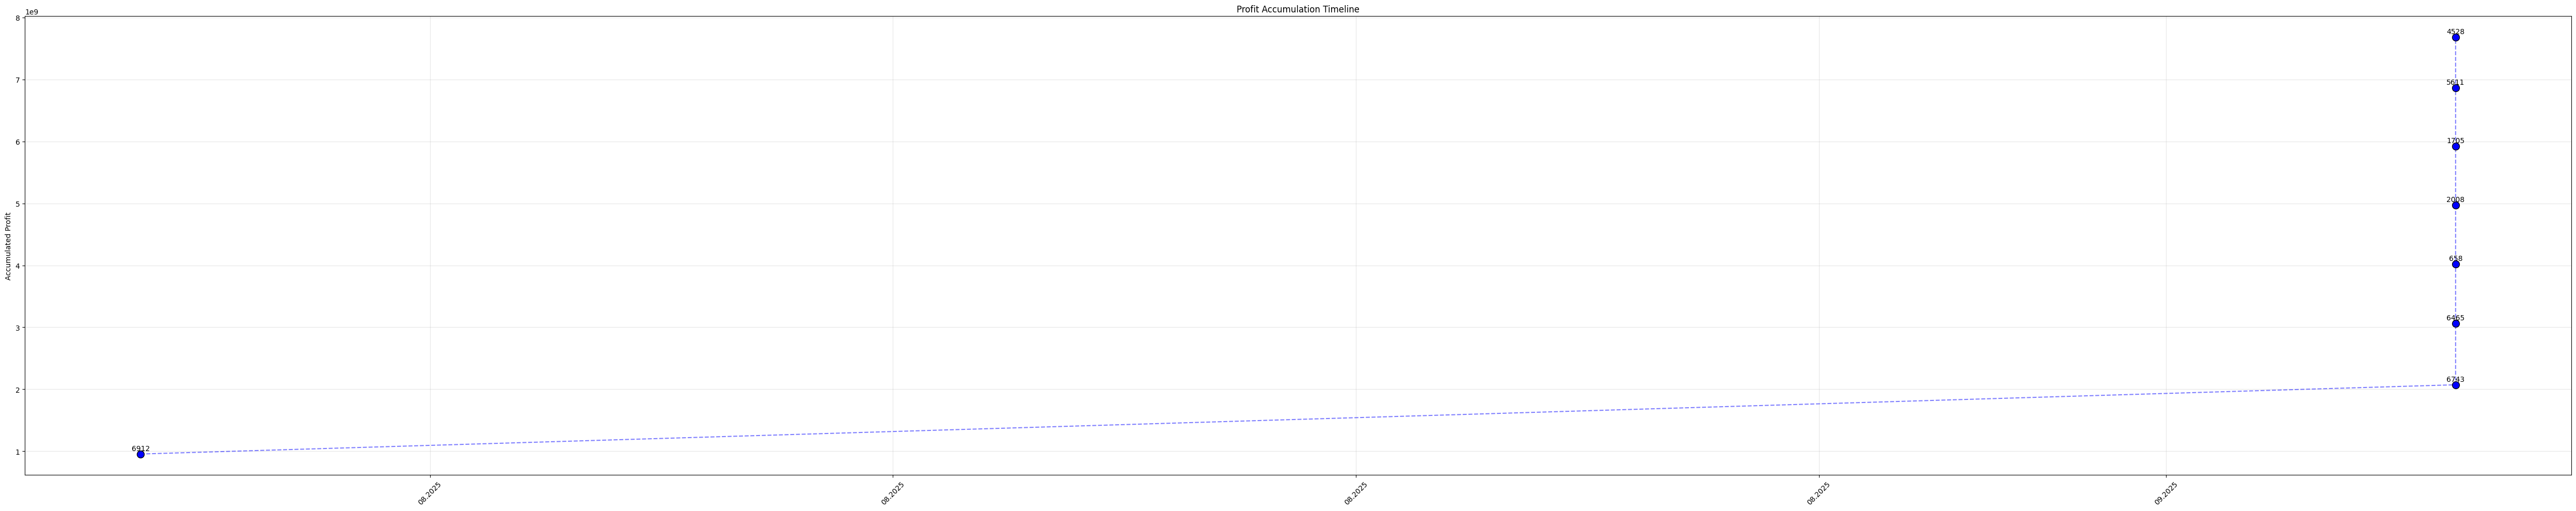

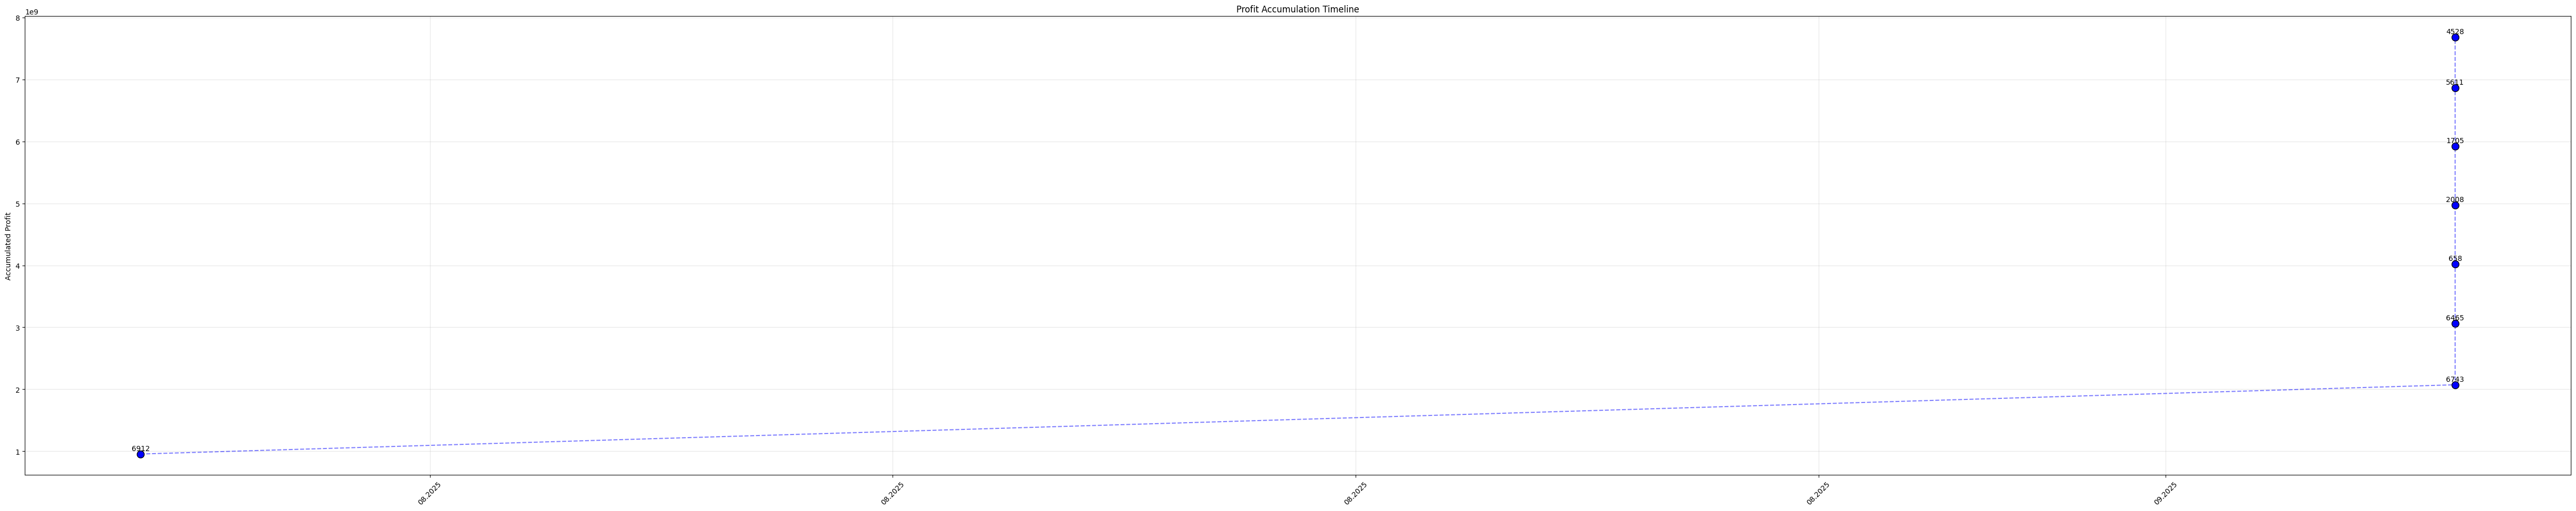

In [ ]:
viz = GraphVisualizer(figsize=(50, 10))
# viz.render(plan)
viz.render(plan_default)
viz.render(plan_test)

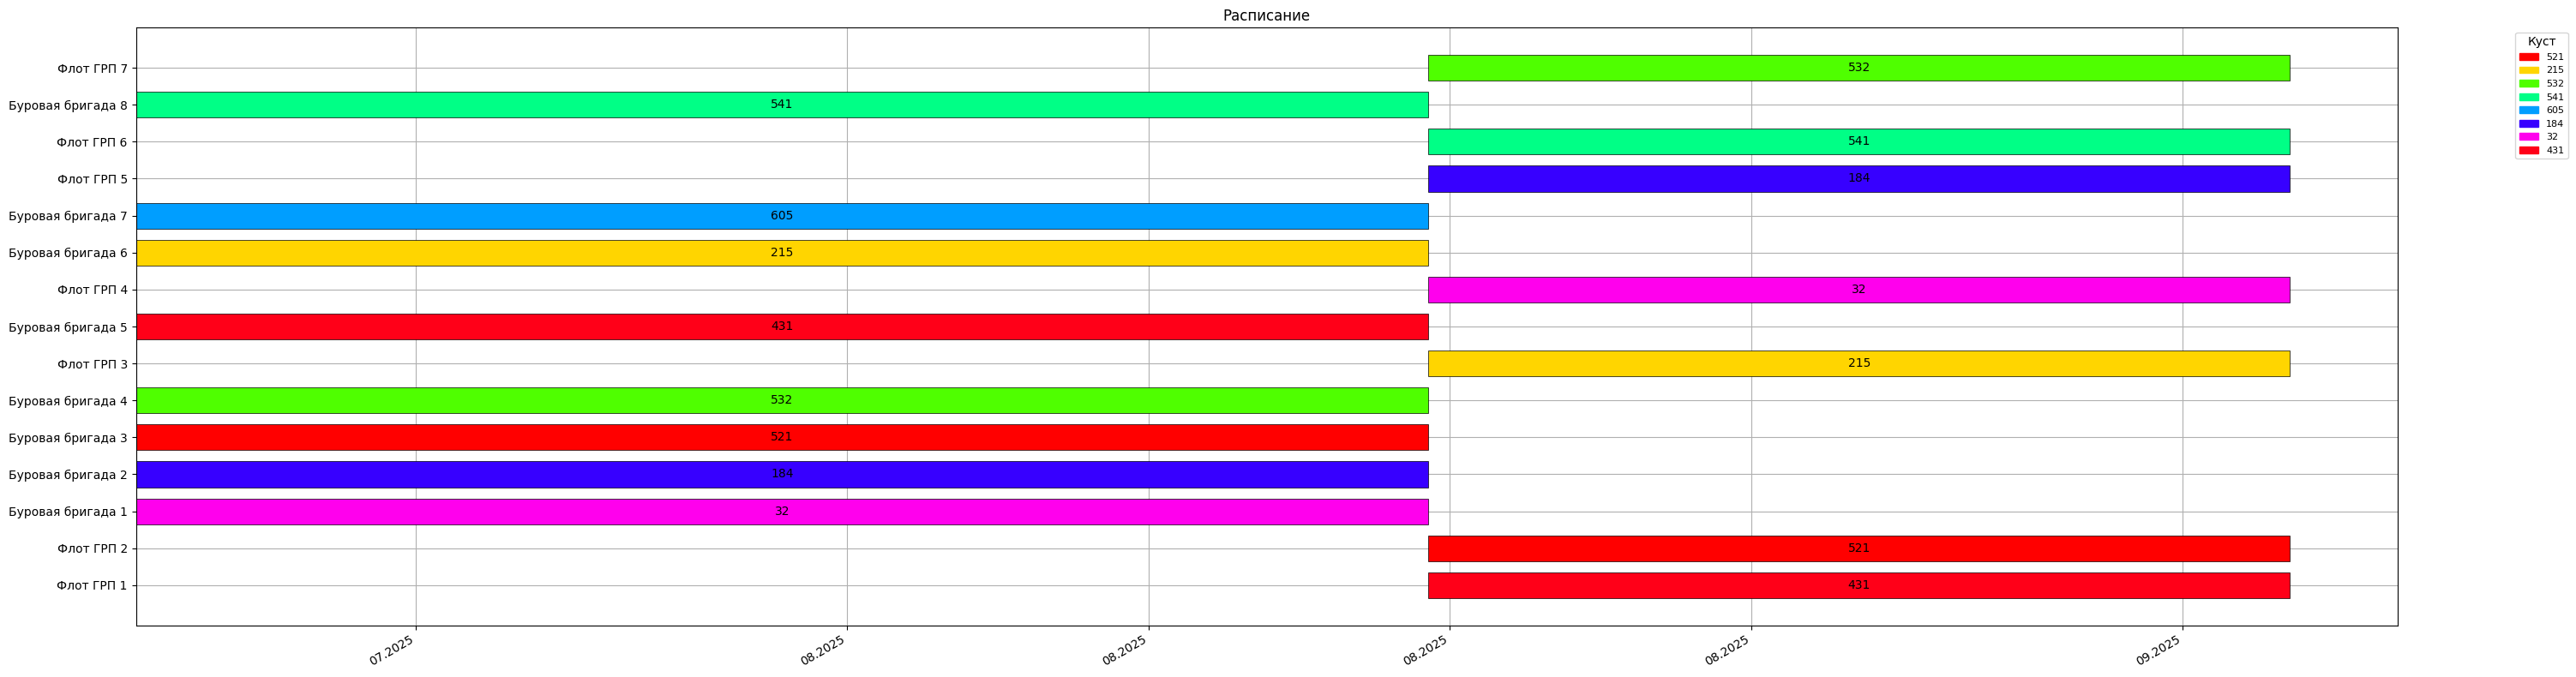

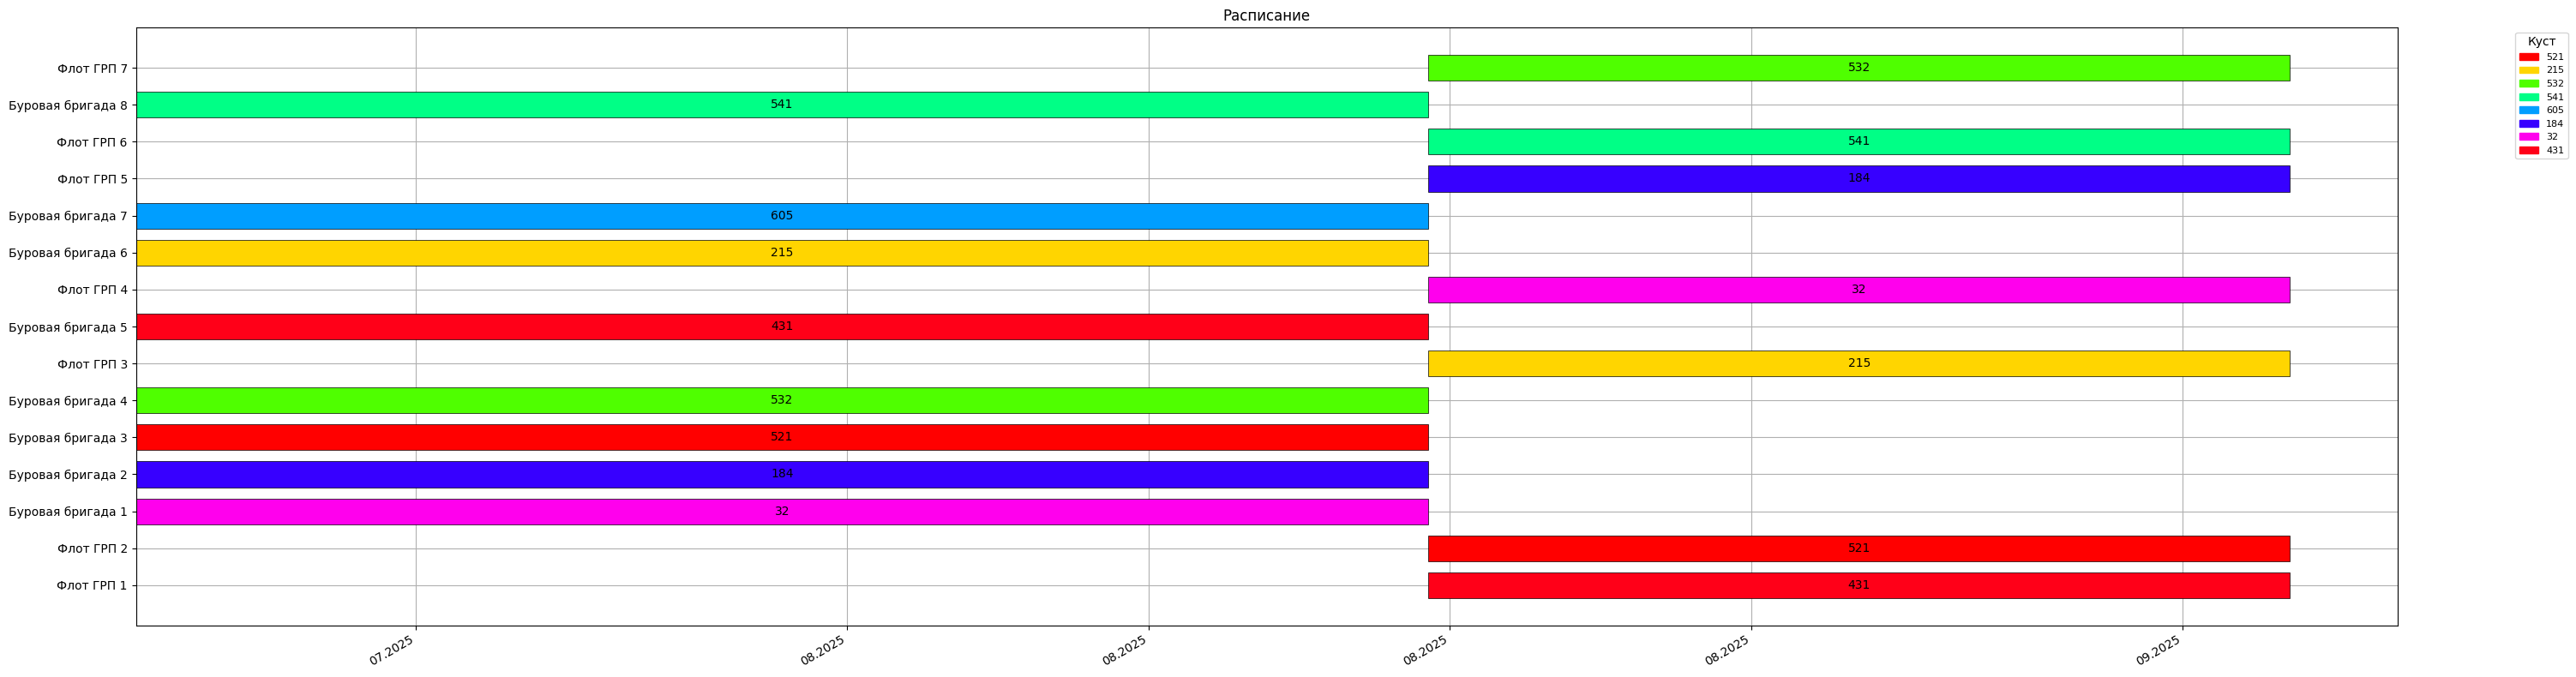

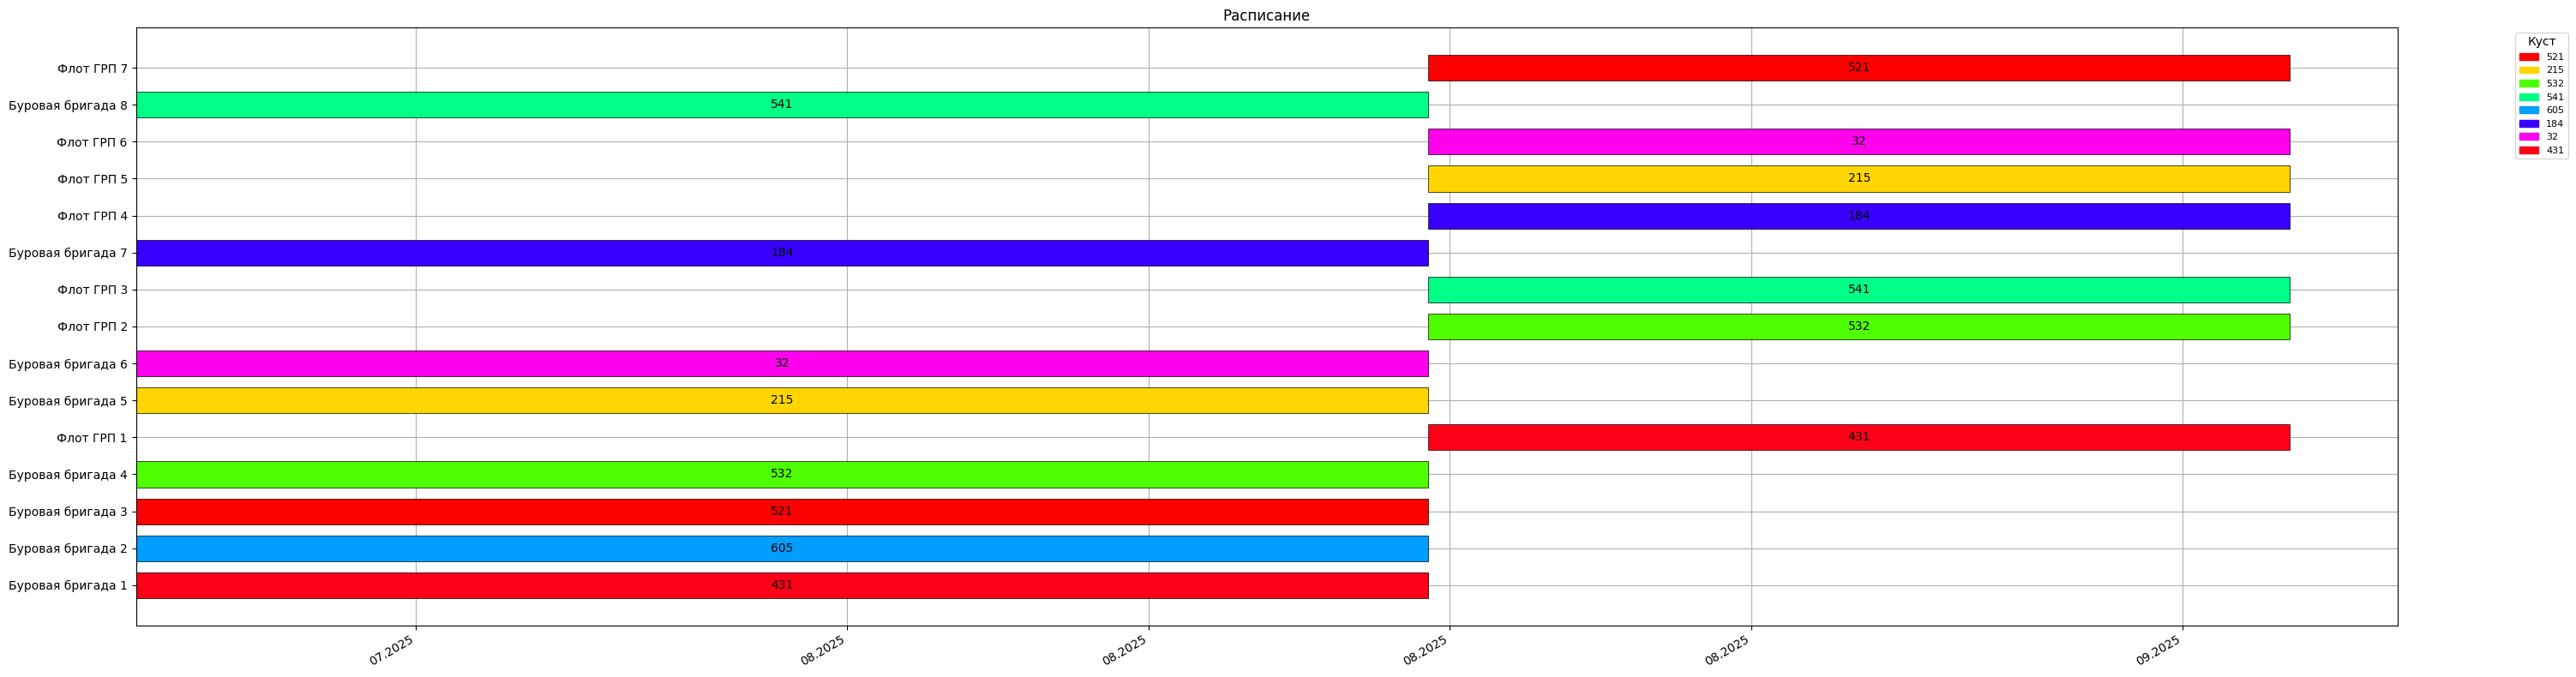

In [ ]:
viz = GantVisualizer(figsize=(30, 8))
viz.render_by_teams(plan)
viz.render_by_teams(plan_default)
viz.render_by_teams(plan_test)

# Выбо оптимального количества буровых бригад

In [ ]:
best_team_quantity = 0
best_npv = 0

limit_capex = 7000 * 1e6

from wellplan.builder_test import PlanBuilder_test

builder_test = PlanBuilder_test(
    start=datetime.now(),
    end=datetime.now() + timedelta(days=365 * 25),
    cost_function=npv,
    production_profile=production_profile,
)

for i in range(1, 15):
        team_pool = TeamPool()
        team_pool.add_teams(['ГС'], num_teams=i)
        team_pool.add_teams(['грп'], num_teams=i)
        plan_best_team_quantity = builder_test.compile(
            wells,
            manager=TeamManager(
                team_pool=team_pool,
                movement=movement,
            ),
            risk_strategy=ClusterRandomRiskStrategy(trigger_chance=0.0),
        )

        print(plan_best_team_quantity.total_profit())

        scenario_capex = plan_best_team_quantity.total_capex()

        if (best_npv < plan_best_team_quantity.total_profit()) and (scenario_capex < limit_capex):
            best_npv = plan_best_team_quantity.total_profit()
            best_scenario_capex = scenario_capex
            best_team_quantity = i
        
        


print(f"Лучший NPV: {round(best_npv / 1e6, 3)} млн рублей при количестве буровых бригад: {best_team_quantity}, CAPEX: {round(best_scenario_capex / 1e6,2)} млн рублей")

ModuleNotFoundError: No module named 'wellplan.builder_test'

No production profile found for well 2069
Linear profiler is used for well 2069
No production profile found for well 2694
Linear profiler is used for well 2694
No production profile found for well 2070
Linear profiler is used for well 2070
No production profile found for well 2695
Linear profiler is used for well 2695
No production profile found for well 2696
Linear profiler is used for well 2696
No production profile found for well 2697
Linear profiler is used for well 2697
No production profile found for well 2698
Linear profiler is used for well 2698
No production profile found for well 2699
Linear profiler is used for well 2699
No production profile found for well 2700
Linear profiler is used for well 2700
No production profile found for well 8493
Linear profiler is used for well 8493
No production profile found for well 118БП
Linear profiler is used for well 118БП
No production profile found for well 122БП
Linear profiler is used for well 122БП
No production profile found for well

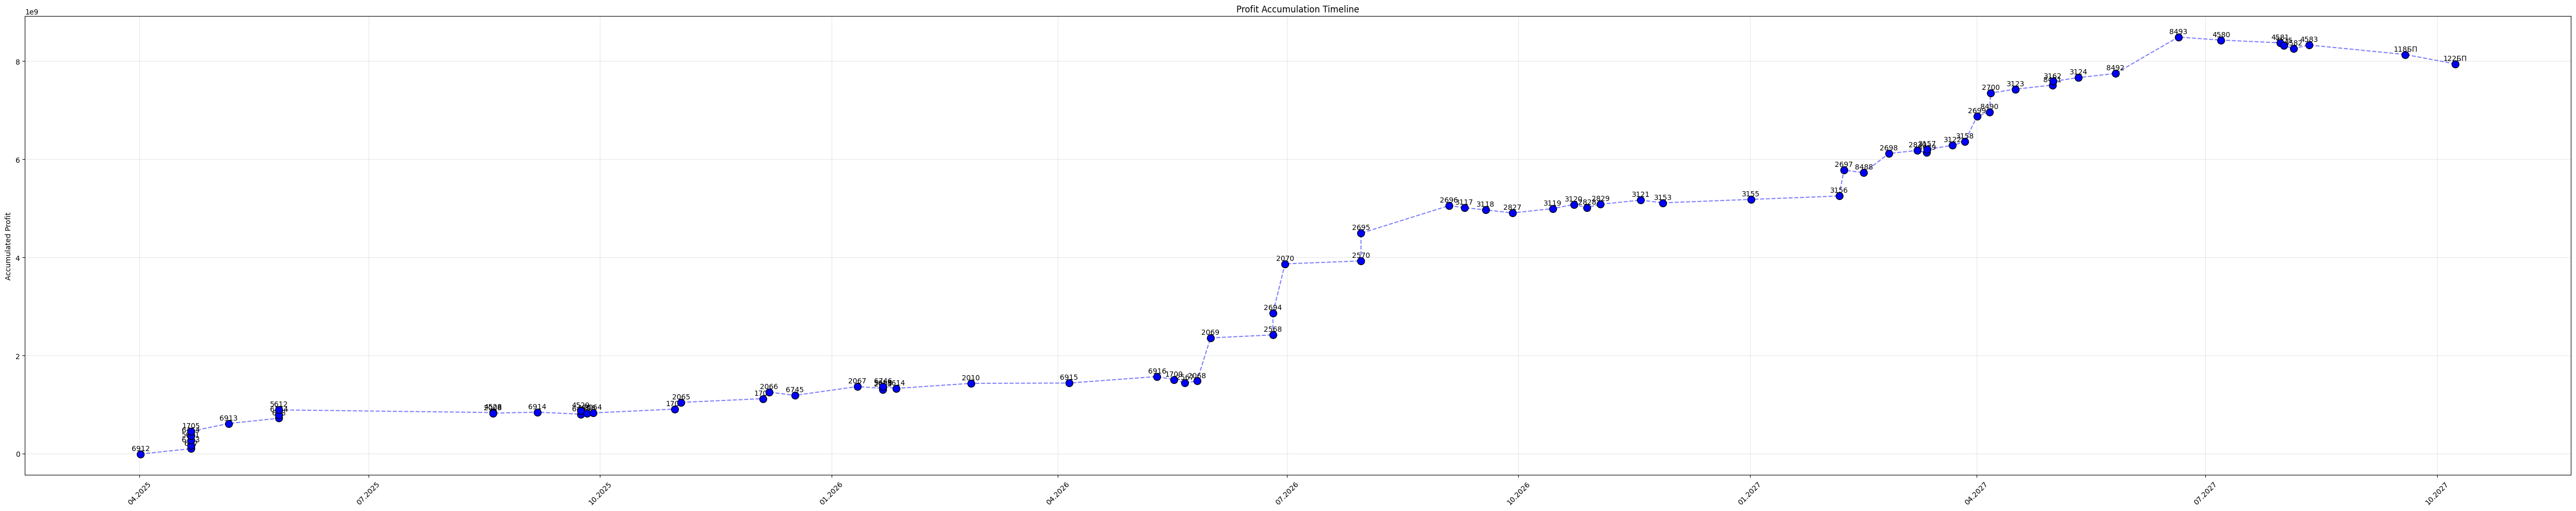

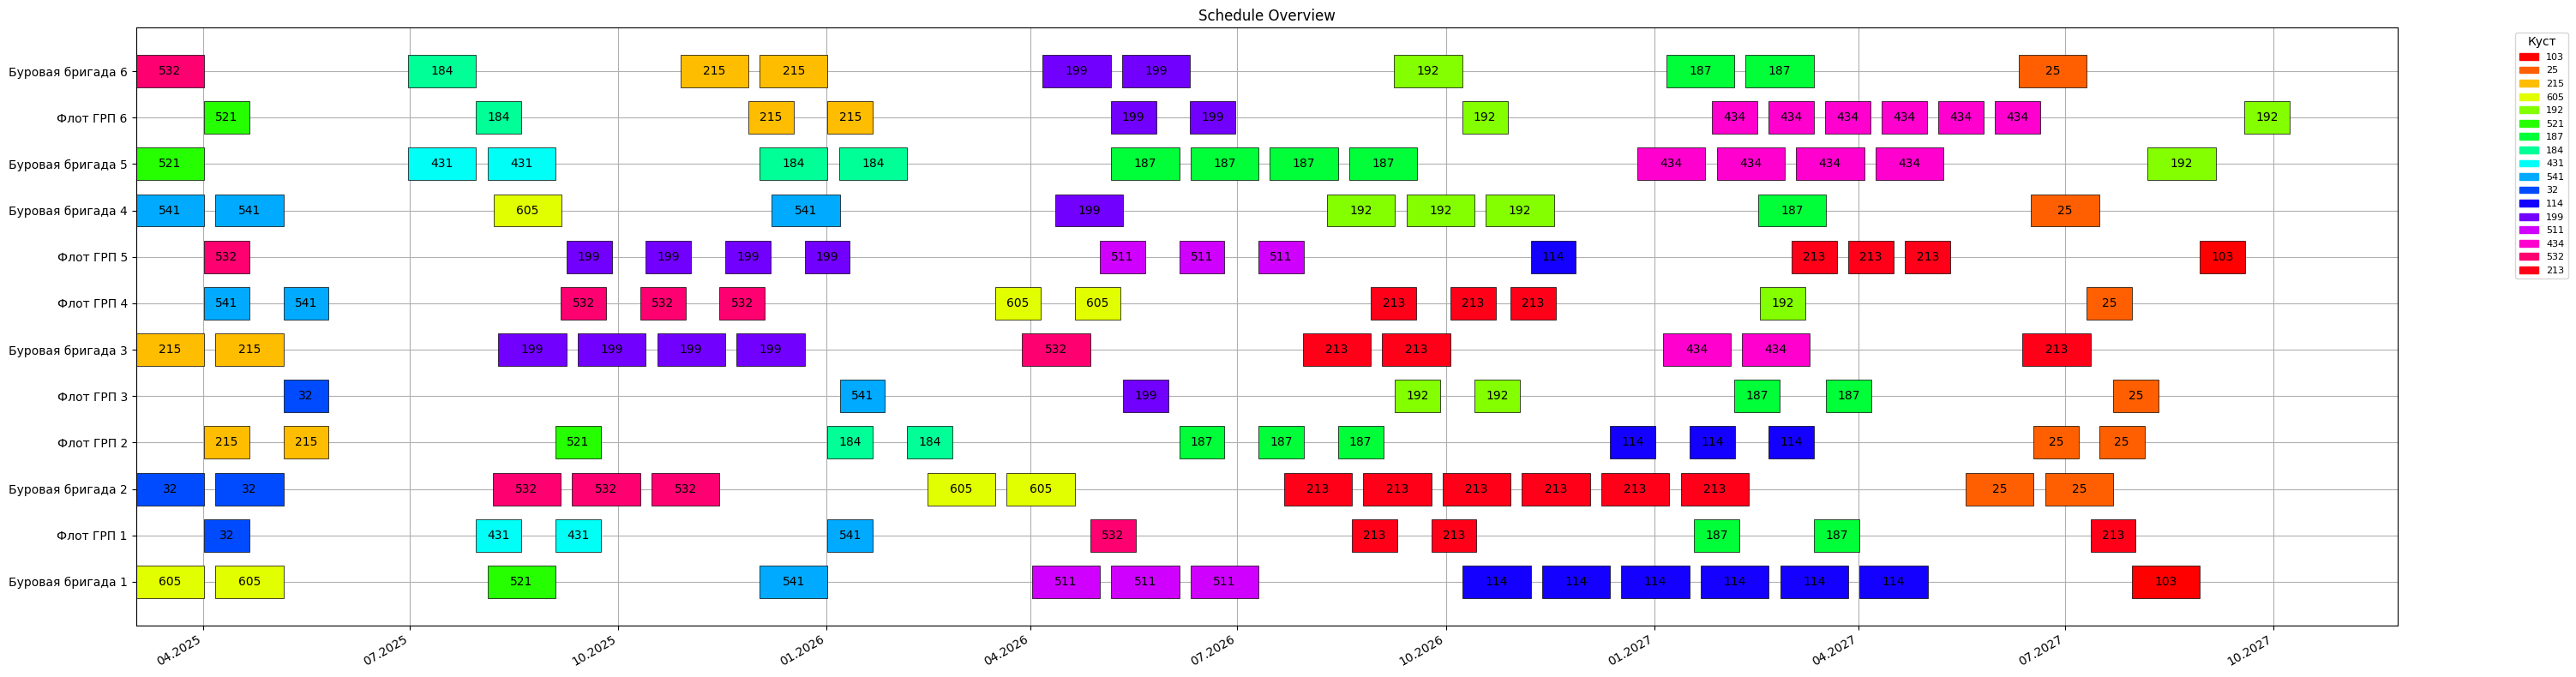

In [ ]:
builder_res = PlanBuilder_default(
    start=datetime.now(),
    end=datetime.now() + timedelta(days=365 * 25),
    cost_function=npv,
    production_profile=production_profile,
)
team_pool = TeamPool()
team_pool.add_teams(['ГС'], num_teams=best_team_quantity)
team_pool.add_teams(['грп'], num_teams=best_team_quantity)
plan_best_team_quantity = builder_res.compile(
        wells,
        manager=TeamManager(
            team_pool=team_pool,
            movement=movement,
        ),
        risk_strategy=ClusterRandomRiskStrategy(trigger_chance=0.0),
    )

viz = GraphVisualizer(figsize=(50, 10))
viz.render(plan_best_team_quantity)
viz = GantVisualizer(figsize=(30, 8))
viz.render_by_teams(plan_best_team_quantity)

In [ ]:
viz = GantVisualizer(figsize=(10, 30))
viz.render(plan)

NameError: name 'plan' is not defined

In [ ]:
plans = []
for i in range(5):
    plan = builder.compile(
        wells,
        manager=TeamManager(
            team_pool=team_pool,
        ),
        risk_strategy=ClusterRandomRiskStrategy(trigger_chance=0.0),
    )
    plans.append(plan)

No production profile found for well 118БП
Linear profiler is used for well 118БП
No production profile found for well 2694
Linear profiler is used for well 2694
No production profile found for well 2695
Linear profiler is used for well 2695
No production profile found for well 2696
Linear profiler is used for well 2696
No production profile found for well 2697
Linear profiler is used for well 2697
No production profile found for well 2698
Linear profiler is used for well 2698
No production profile found for well 2699
Linear profiler is used for well 2699
No production profile found for well 2700
Linear profiler is used for well 2700
No production profile found for well 122БП
Linear profiler is used for well 122БП
No production profile found for well 2069
Linear profiler is used for well 2069
No production profile found for well 2070
Linear profiler is used for well 2070
No production profile found for well 8493
Linear profiler is used for well 8493
No production profile found for well

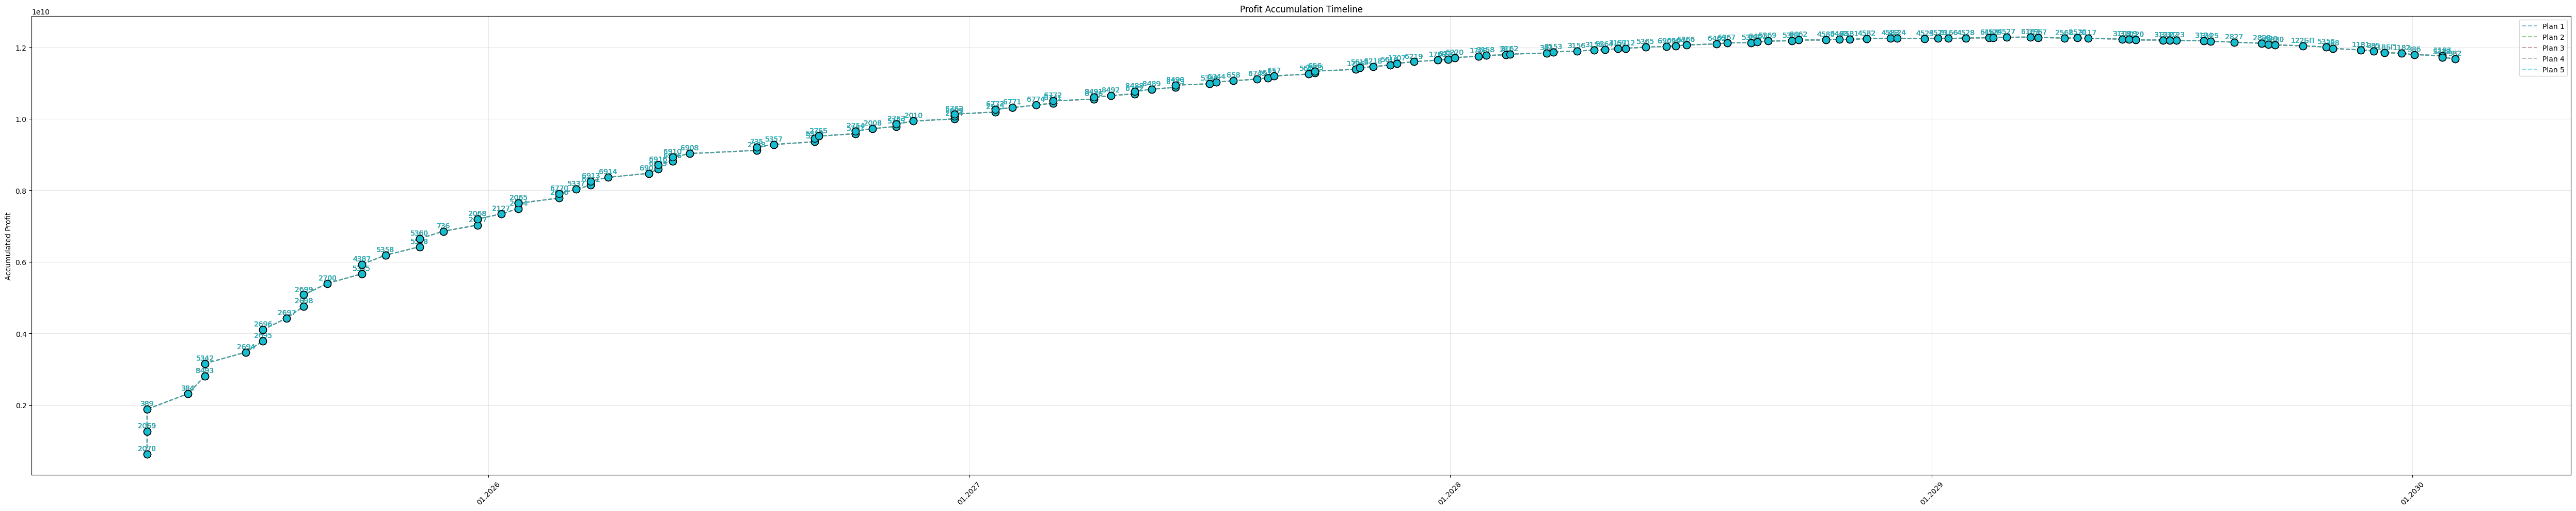

In [ ]:
viz = GraphVisualizer(figsize=(50, 10))
viz.render_multiple(plans)